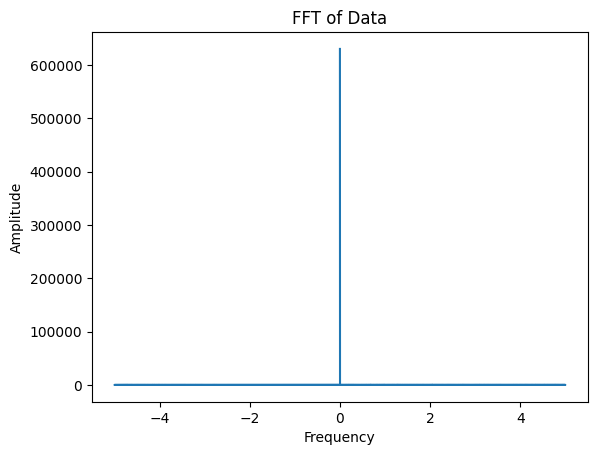

In [36]:
import numpy as np
import matplotlib.pyplot as plt
m11, sigma11  = 6,1
m12, sigma12  = 120,1
m21, sigma21  = 3,1
m22, sigma22  = 9,1

x1 = 0.5*np.random.normal(m11,sigma11,10000)+0.5*np.random.normal(m12,sigma12,10000)
x2 = 0.5*np.random.normal(m21,sigma21,10000)+0.5*np.random.normal(m22,sigma22,10000)


data = x1
# Calculate the FFT
fft_data = np.fft.fft(data)

# Calculate the frequencies
sampling_rate = 10.0  # Adjust if necessary
freq = np.fft.fftfreq(len(data), 1/sampling_rate)

# Plot the FFT
plt.plot(freq, np.abs(fft_data))

# Add labels and title
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('FFT of Data')

# Show the plot
plt.show()




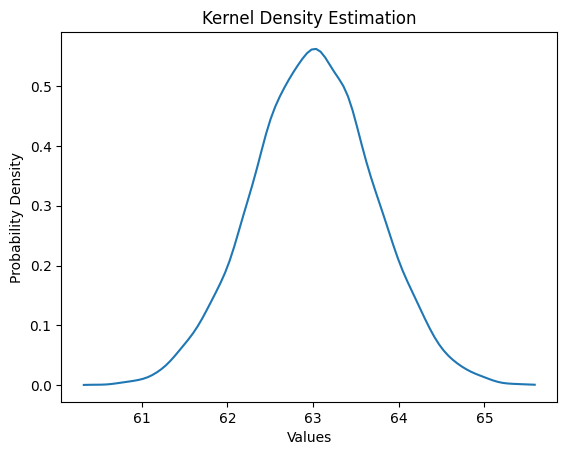

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate random data
data = x1

# Perform kernel density estimation
kde = gaussian_kde(data)

# Define the range of values for PDF estimation
x = np.linspace(min(data), max(data), 100)

# Estimate the PDF using kernel density estimation
pdf = kde.evaluate(x)

# Plot the PDF
plt.plot(x, pdf)
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.title('Kernel Density Estimation')

# Show the plot
plt.show()


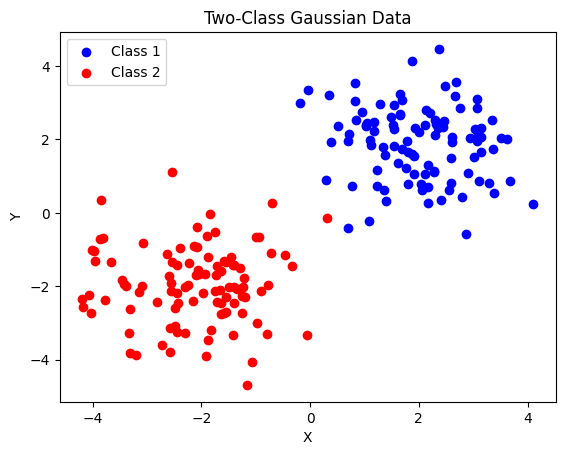

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters for class 1
mean1 = [2, 2]
cov1 = [[1, 0], [0, 1]]

# Set the parameters for class 2
mean2 = [-2, -2]
cov2 = [[1, 0], [0, 1]]

# Generate samples for class 1
samples_class1 = np.random.multivariate_normal(mean1, cov1, 100)

# Generate samples for class 2
samples_class2 = np.random.multivariate_normal(mean2, cov2, 100)

# Plot the data
plt.scatter(samples_class1[:, 0], samples_class1[:, 1], c='blue', label='Class 1')
plt.scatter(samples_class2[:, 0], samples_class2[:, 1], c='red', label='Class 2')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Two-Class Gaussian Data')

# Add a legend
plt.legend()

# Show the plot
plt.show()


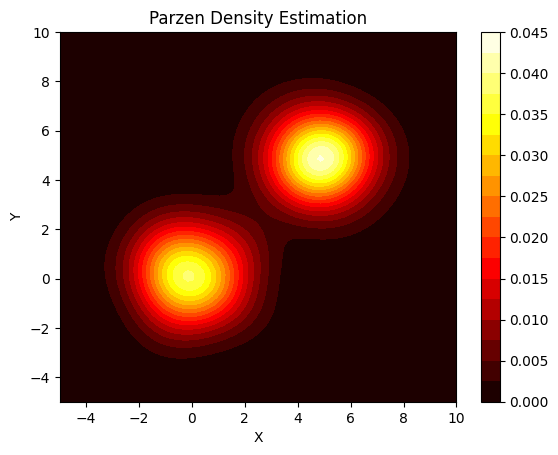

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def parzen_density_estimate(samples, query_point, h):
    """Compute the Parzen density estimate at a query point."""
    kernel = multivariate_normal(mean=query_point, cov=h)
    return np.mean(kernel.pdf(samples))

def parzen_density_estimation(samples, query_points, h):
    """Compute the Parzen density estimates at multiple query points."""
    estimates = []
    for point in query_points:
        estimate = parzen_density_estimate(samples, point, h)
        estimates.append(estimate)
    return np.array(estimates)

# Generate random data
np.random.seed(0)
data = np.concatenate([np.random.normal(loc=0, scale=1, size=(100, 2)),
                       np.random.normal(loc=5, scale=1, size=(100, 2))])

# Set the query points
x = np.linspace(-5, 10, 100)
y = np.linspace(-5, 10, 100)
X, Y = np.meshgrid(x, y)
query_points = np.vstack([X.ravel(), Y.ravel()]).T

# Set the bandwidth (window size)
h = np.eye(2)  # Bandwidth matrix (covariance matrix)

# Compute the Parzen density estimates
density_estimates = parzen_density_estimation(data, query_points, h)

# Reshape the density estimates for plotting
density_estimates = density_estimates.reshape(X.shape)

# Plot the density estimates
plt.contourf(X, Y, density_estimates, levels=20, cmap='hot')
plt.colorbar()

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Parzen Density Estimation')

# Show the plot
plt.show()


In [49]:
from itertools import starmap

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import mlab
sns.set(color_codes=True)
# inline plots in jupyter notebook
%matplotlib inline


# generate synthetic data from a mixture of two Gaussians with equal weights
# the solution below readily generalises to more components 
nsamples = 10000
means = [6, 12]
sds = [1, 1]
weights = [0.5, 0.5]
draws = np.random.multinomial(nsamples, weights)
samples = np.concatenate(list(starmap(np.random.normal, zip(means, sds, draws))))

means2 = [3, 9]
sds2 = [1, 1]
weights2 = [0.5, 0.5]
draws2 = np.random.multinomial(nsamples, weights2)
samples2 = np.concatenate(list(starmap(np.random.normal, zip(means2, sds2, draws2))))

C:\Users\prafu\AppData\Local\Temp\ipykernel_13968\1375100916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(samples,bins=100, rug=True)
C:\Users\prafu\AppData\Local\Temp\ipykernel_13968\1375100916.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(samples2,bins=100,rug=True)


<Axes: ylabel='Density'>

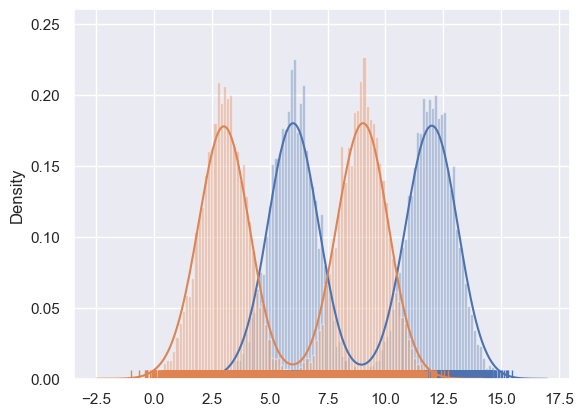

In [59]:
sns.distplot(samples,bins=100, rug=True)
sns.distplot(samples2,bins=100,rug=True)

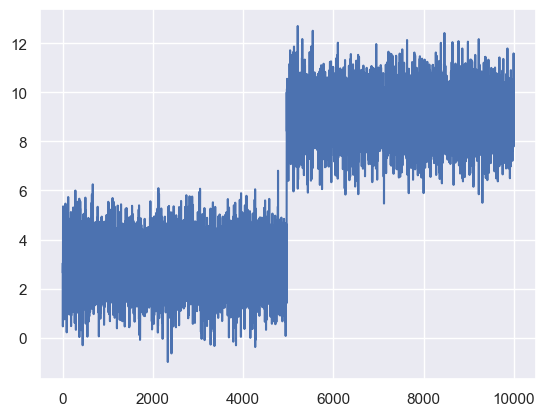

In [60]:
plt.plot(samples2)

In [2]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
!git clone https://github.com/PrafulAradhyamth/DLpractice.git

Cloning into 'DLpractice'...
